### COVID-19 on ventilator prediction model based on Covid cases and hospitalisation


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Get the curent date/time
today = pd.to_datetime('today')

In [3]:
# Downloads the lates data availlable and saves it.
# Run this step dayly to update the data.

# df_Covid_data = pd.read_csv('https://covidtracking.com/data/download/national-history.csv')
# df_Covid_data.to_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')

In [4]:
# Loads the last saved data. Make sure the data is up to date by running the cell above. 
df_Covid_data = pd.read_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')
df_Covid_data

,Unnamed: 0,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,0,2020-12-08,277367.0,2622,32406.0,20483.0,4193,104600.0,593679.0,164563564,1184838,3359.0,7245.0,14930563,213498,5786915.0,56,207572528,1638354
1,1,2020-12-07,274745.0,1347,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,3328.0,7073.0,14717065,180193,5714557.0,56,205934174,1835388
2,2,2020-12-06,273398.0,1146,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,3322.0,7095.0,14536872,177801,5624609.0,56,204098786,1648306
3,3,2020-12-05,272252.0,2461,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,3321.0,7006.0,14359071,212880,5576152.0,56,202450480,2190899
4,4,2020-12-04,269791.0,2563,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,3305.0,6999.0,14146191,224831,5470389.0,56,200259581,1854869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,317,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
318,318,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
319,319,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
320,320,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [5]:
# Check for shape, null values and data types of the data
print("Size/Shape of the dataset",df_Covid_data.shape)
print("Checking for null values:\n",df_Covid_data.isnull().sum())
print("Checking Data-type:",df_Covid_data.dtypes)

Size/Shape of the dataset (322, 19)
Checking for null values:
 Unnamed: 0                   0
date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64
Checking Data-type: Unnamed: 0                    int64
date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative     

In [6]:
# Print the column names
df_Covid_data.columns

Index(['Unnamed: 0', 'date', 'death', 'deathIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [7]:
#Drop columns that are not needed for the model
df_Covid_data.drop(['Unnamed: 0','death',\
       'deathIncrease','onVentilatorCumulative','states'],1,inplace = True)

In [8]:
df_Covid_data.columns

Index(['date', 'inIcuCumulative', 'inIcuCurrently', 'hospitalizedIncrease',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'negative',
       'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [9]:
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-08,32406.0,20483.0,4193,104600.0,593679.0,164563564,1184838,7245.0,14930563,213498,5786915.0,207572528,1638354
1,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14717065,180193,5714557.0,205934174,1835388
2,2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306
3,2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
4,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2020-01-26,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
318,2020-01-25,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
319,2020-01-24,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
320,2020-01-23,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,1


In [10]:
# Drop the null rows and sort the data by date
df_Covid_data = df_Covid_data.dropna()
df_Covid_data = df_Covid_data.sort_values(by = "date", ascending = True)
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
257,2020-03-26,91.0,1299.0,2478,7805.0,9551.0,482148,86516,258.0,92976,17734,97.0,632999,108422
256,2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,735114,102115
255,2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456
254,2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
253,2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
3,2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
2,2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306
1,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14717065,180193,5714557.0,205934174,1835388


In [11]:
# Set the date as index
df_Covid_data.set_index('date', inplace =True)
df_Covid_data

,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,
2020-03-26,91.0,1299.0,2478,7805.0,9551.0,482148,86516,258.0,92976,17734,97.0,632999,108422
2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,735114,102115
2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456
2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306


In [12]:
# Specified data columns to be used in the model 
X = df_Covid_data[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered']]
y = df_Covid_data['onVentilatorCurrently'].values.reshape(-1,1)
y

array([[ 258.],
       [ 324.],
       [ 390.],
       [ 439.],
       [ 451.],
       [ 507.],
       [ 561.],
       [ 574.],
       [ 623.],
       [ 656.],
       [ 652.],
       [2961.],
       [4076.],
       [4131.],
       [5794.],
       [5937.],
       [5978.],
       [5968.],
       [6168.],
       [5975.],
       [6032.],
       [5940.],
       [6096.],
       [5729.],
       [5603.],
       [5567.],
       [5514.],
       [5474.],
       [5464.],
       [5187.],
       [5266.],
       [5121.],
       [4867.],
       [4760.],
       [4796.],
       [4712.],
       [4707.],
       [4845.],
       [4761.],
       [4848.],
       [4818.],
       [4753.],
       [7070.],
       [6788.],
       [6551.],
       [6395.],
       [6350.],
       [6352.],
       [6156.],
       [5940.],
       [5746.],
       [5529.],
       [5467.],
       [5257.],
       [5032.],
       [4911.],
       [4868.],
       [4716.],
       [4620.],
       [4383.],
       [4237.],
       [4215.],
       [

In [13]:

print(X.shape, y.shape)


(258, 5) (258, 1)


## Model - LinearRegression

In [14]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)


In [15]:
X_train

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered
date,,,,,
2020-10-03,1083,30209.0,7311280,50934,2895307.0
2020-09-07,474,32116.0,6249594,28144,2331821.0
2020-04-04,5012,30268.0,316808,32885,12844.0
2020-08-13,2651,47322.0,5205014,51621,1773505.0
2020-04-28,2006,56034.0,1017548,25372,139080.0
...,...,...,...,...,...
2020-05-08,6240,49758.0,1285663,27159,198423.0
2020-05-09,1669,48561.0,1310843,25180,211899.0
2020-12-06,2311,101501.0,14536872,177801,5624609.0


In [16]:
# Choose the model
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# model.fit(X_train, y_train)

In [18]:
# print(f"Training Data Score: {model.score(X_train, y_train)}")
# print(f"Testing Data Score: {model.score(X_test, y_test)}")

In [19]:
# print('Weight coefficients:', model.coef_)
# print('y-axis intercept:', model.intercept_)

### Skaling the data using StandardScaler, and plotting a residual plot


In [20]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [22]:
# X_train = X_scaler.inverse_transform(X_train_scaled)
# X_train

In [23]:
y_train_scaled.shape

(193, 1)

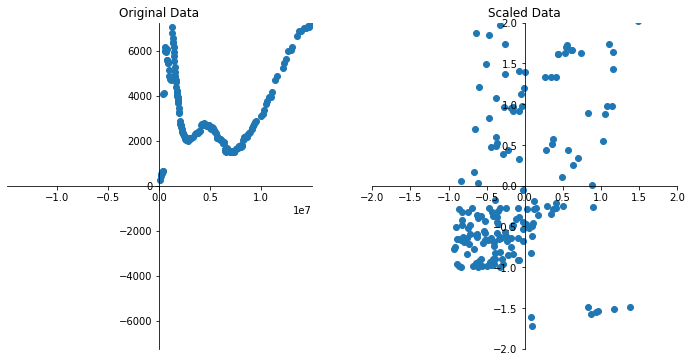

In [24]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

###  Fit the Model to the scaled training data and make predictions using the scaled test data

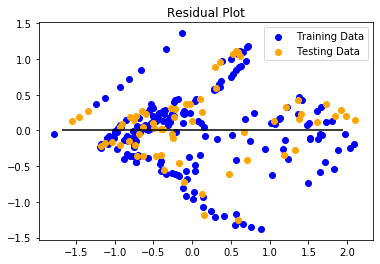

In [25]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [26]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)


Training scaled Data Score: 0.7225479817581639
Testing scaled Data Score: 0.74985080568909
Weight coefficients: [[ 0.01428623  1.46475867 -3.63630061 -0.57796713  3.38790436]]
y-axis intercept: [-1.9544665e-16]


## Quantify the model using scaled data

In [27]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22922311938952586, R2: 0.74985080568909


In [28]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[258.]
Predicted output:[167.33]
Prediction Error:[-90.67]


In [29]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)
predicted_y.reshape(1,-1).tolist()[0]


[167.33,
 544.78,
 699.96,
 903.14,
 1076.11,
 1283.98,
 1602.07,
 1805.92,
 2065.22,
 2611.55,
 2973.36,
 3404.35,
 4358.03,
 4555.19,
 5205.23,
 5464.3,
 5782.62,
 5790.99,
 5952.32,
 6329.34,
 6264.7,
 6134.75,
 6010.55,
 5938.38,
 5729.64,
 5753.76,
 6138.8,
 6032.8,
 5932.8,
 5589.69,
 5538.08,
 5524.68,
 5604.09,
 5546.49,
 5521.24,
 5268.89,
 5274.13,
 5133.45,
 4991.67,
 5010.54,
 5093.64,
 4919.53,
 4717.69,
 4488.71,
 4319.42,
 4135.8,
 4196.76,
 4205.23,
 4151.77,
 3894.17,
 3686.41,
 3615.39,
 3458.23,
 3436.4,
 3443.79,
 3400.91,
 3220.73,
 3238.34,
 3054.47,
 3000.46,
 3015.02,
 3252.9,
 3070.33,
 3247.0,
 3068.87,
 2904.57,
 2898.19,
 2879.89,
 2808.46,
 2740.49,
 2628.37,
 2570.49,
 2502.74,
 2497.77,
 2503.33,
 2512.1,
 2402.31,
 2229.47,
 2123.31,
 1966.54,
 1952.62,
 2033.56,
 1980.47,
 1996.9,
 1902.66,
 1829.47,
 1700.55,
 1765.6,
 1912.55,
 1944.86,
 1924.38,
 1968.04,
 1811.38,
 1899.93,
 1881.03,
 2083.93,
 2123.97,
 2171.29,
 2370.62,
 2346.48,
 2329.55,
 2550.

In [30]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

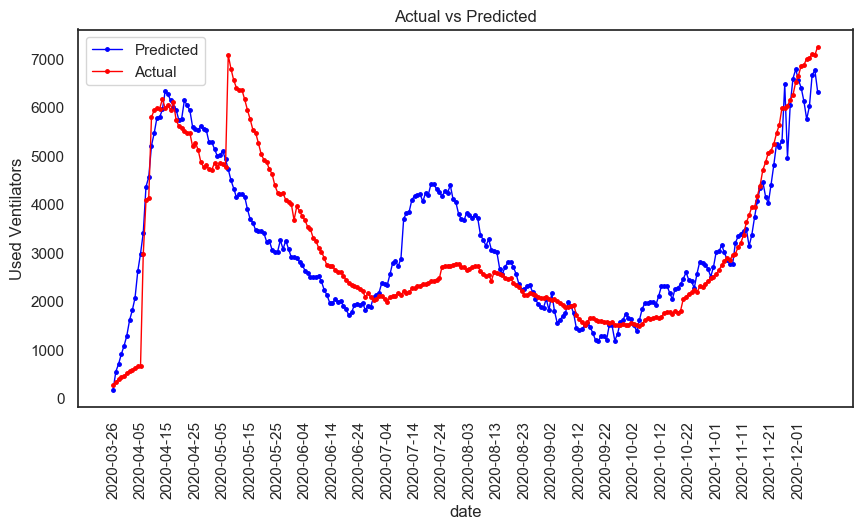

In [31]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

# Model 2 Random Forest Regressor

In [32]:
## Model 2
#Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [33]:
y_train_scaled_1d = y_train_scaled .ravel()
y_test_scaled_1d = y_test_scaled .ravel()

In [34]:
rg = RandomForestRegressor(n_estimators=40)
rg.fit(X_train_scaled, y_train_scaled_1d)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
print(f"Training scaled Data Score: {rg.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {rg.score(X_test_scaled, y_test_scaled)}")

Training scaled Data Score: 0.995083799311965
Testing scaled Data Score: 0.97336172162089


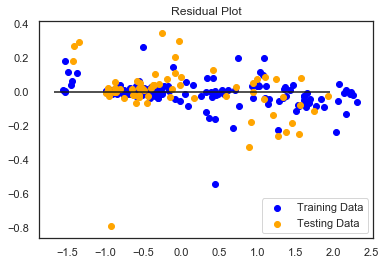

In [36]:
# Build residual plot
plt.scatter(rg.predict(X_train_scaled), rg.predict(X_train_scaled) - y_train_scaled_1d, c="blue", label="Training Data")
plt.scatter(rg.predict(X_test_scaled), rg.predict(X_test_scaled) - y_test_scaled_1d, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled_1d.min(), xmax=y_test_scaled_1d.max())
plt.title("Residual Plot")
plt.show()

In [37]:
predictions_rg = rg.predict(X_scaled)
print(f"True output:{y}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions_rg).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions_rg).round(2)-y}") 

True output:[[ 258.]
 [ 324.]
 [ 390.]
 [ 439.]
 [ 451.]
 [ 507.]
 [ 561.]
 [ 574.]
 [ 623.]
 [ 656.]
 [ 652.]
 [2961.]
 [4076.]
 [4131.]
 [5794.]
 [5937.]
 [5978.]
 [5968.]
 [6168.]
 [5975.]
 [6032.]
 [5940.]
 [6096.]
 [5729.]
 [5603.]
 [5567.]
 [5514.]
 [5474.]
 [5464.]
 [5187.]
 [5266.]
 [5121.]
 [4867.]
 [4760.]
 [4796.]
 [4712.]
 [4707.]
 [4845.]
 [4761.]
 [4848.]
 [4818.]
 [4753.]
 [7070.]
 [6788.]
 [6551.]
 [6395.]
 [6350.]
 [6352.]
 [6156.]
 [5940.]
 [5746.]
 [5529.]
 [5467.]
 [5257.]
 [5032.]
 [4911.]
 [4868.]
 [4716.]
 [4620.]
 [4383.]
 [4237.]
 [4215.]
 [4222.]
 [4080.]
 [4032.]
 [4004.]
 [3669.]
 [3950.]
 [3852.]
 [3749.]
 [3665.]
 [3523.]
 [3476.]
 [3298.]
 [3240.]
 [3090.]
 [3020.]
 [2886.]
 [2734.]
 [2726.]
 [2716.]
 [2640.]
 [2594.]
 [2588.]
 [2520.]
 [2434.]
 [2380.]
 [2321.]
 [2299.]
 [2293.]
 [2248.]
 [2214.]
 [2075.]
 [2159.]
 [2077.]
 [2011.]
 [2044.]
 [2098.]
 [2105.]
 [2049.]
 [1982.]
 [2080.]
 [2105.]
 [2098.]
 [2172.]
 [2127.]
 [2197.]
 [2169.]
 [2182.]
 [2259.

In [38]:
predicted_y_rg = y_scaler.inverse_transform(predictions_rg).round(2)

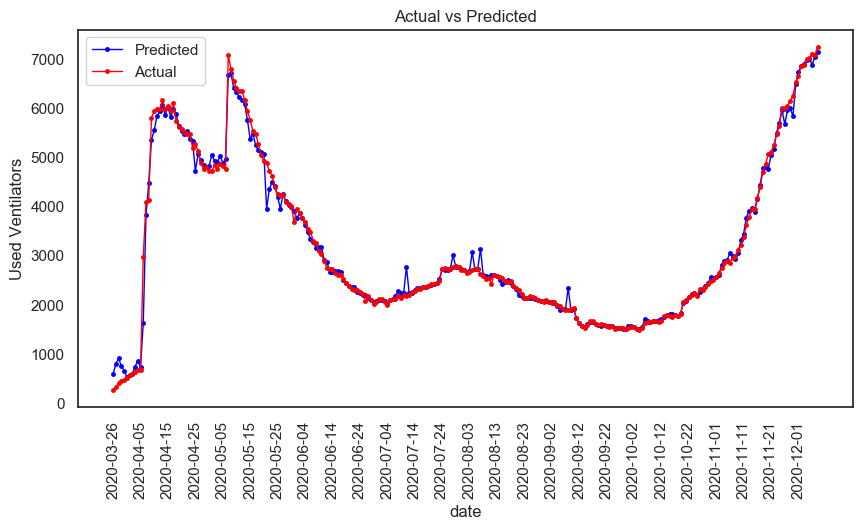

In [39]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y_rg, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

### The random forest regresor scored great with R2 of 0.99, however the random forest regressor is unable to discover trends that would enable it in extrapolating values that fall outside the training set. Having in mind that the currnet covid cases are raising and we are seeing new high every day, this  model willl be abandoned.

#### For more info see https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why

## Model 3, Linear regression with more data columns added


In [40]:
df_Covid_data_Offset = df_Covid_data[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered','onVentilatorCurrently']]
df_Covid_data_Offset

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently
date,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0
...,...,...,...,...,...,...
2020-12-04,4652,101276.0,14146191,224831,5470389.0,6999.0
2020-12-05,3457,101192.0,14359071,212880,5576152.0,7006.0
2020-12-06,2311,101501.0,14536872,177801,5624609.0,7095.0


In [41]:
# Function for shifting row values
def add_data_shift (data_frame, column_name, x):
    for i in x:
        shift_i = column_name + '_shifted_'+str(i)
        data_frame[shift_i] = data_frame[column_name]
        data_frame[shift_i] = data_frame[shift_i].shift(0-i)
    return(data_frame)

In [42]:
add_data_shift (df_Covid_data_Offset, "positive", [1,3,7,10])

C:\Users\stoja\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10
date,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-04,4652,101276.0,14146191,224831,5470389.0,6999.0,14359071.0,14717065.0,NaN,NaN
2020-12-05,3457,101192.0,14359071,212880,5576152.0,7006.0,14536872.0,14930563.0,NaN,NaN
2020-12-06,2311,101501.0,14536872,177801,5624609.0,7095.0,14717065.0,NaN,NaN,NaN


In [43]:
add_data_shift (df_Covid_data_Offset, "hospitalizedCurrently", [1,3,7,10])

C:\Users\stoja\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\stoja\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10
date,,,,,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0,18155.0,22997.0,36159.0,51313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,4652,101276.0,14146191,224831,5470389.0,6999.0,14359071.0,14717065.0,NaN,NaN,101192.0,102148.0,NaN,NaN
2020-12-05,3457,101192.0,14359071,212880,5576152.0,7006.0,14536872.0,14930563.0,NaN,NaN,101501.0,104600.0,NaN,NaN
2020-12-06,2311,101501.0,14536872,177801,5624609.0,7095.0,14717065.0,NaN,NaN,NaN,102148.0,NaN,NaN,NaN


In [44]:
add_data_shift (df_Covid_data_Offset, "recovered", [1,3,7,10])

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered,onVentilatorCurrently,positive_shifted_1,positive_shifted_3,positive_shifted_7,positive_shifted_10,hospitalizedCurrently_shifted_1,hospitalizedCurrently_shifted_3,hospitalizedCurrently_shifted_7,hospitalizedCurrently_shifted_10,recovered_shifted_1,recovered_shifted_3,recovered_shifted_7,recovered_shifted_10
date,,,,,,,,,,,,,,,,,,
2020-03-26,2478,7805.0,92976,17734,97.0,258.0,112220.0,151270.0,252085.0,342463.0,10978.0,14055.0,22997.0,32180.0,2418.0,4076.0,8586.0,14589.0
2020-03-27,2572,10978.0,112220,19244,2418.0,324.0,131826.0,172740.0,283923.0,370872.0,12409.0,15917.0,25777.0,36159.0,3145.0,4560.0,10861.0,16557.0
2020-03-28,2409,12409.0,131826,19606,3145.0,390.0,151270.0,197924.0,316808.0,401573.0,14055.0,18155.0,30268.0,43849.0,4076.0,5666.0,12844.0,18481.0
2020-03-29,2794,14055.0,151270,19444,4076.0,439.0,172740.0,224040.0,342463.0,432490.0,15917.0,20906.0,32180.0,45515.0,4560.0,7084.0,14589.0,21132.0
2020-03-30,2472,15917.0,172740,21470,4560.0,451.0,197924.0,252085.0,370872.0,467580.0,18155.0,22997.0,36159.0,51313.0,5666.0,8586.0,16557.0,24835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,4652,101276.0,14146191,224831,5470389.0,6999.0,14359071.0,14717065.0,NaN,NaN,101192.0,102148.0,NaN,NaN,5576152.0,5714557.0,NaN,NaN
2020-12-05,3457,101192.0,14359071,212880,5576152.0,7006.0,14536872.0,14930563.0,NaN,NaN,101501.0,104600.0,NaN,NaN,5624609.0,5786915.0,NaN,NaN
2020-12-06,2311,101501.0,14536872,177801,5624609.0,7095.0,14717065.0,NaN,NaN,NaN,102148.0,NaN,NaN,NaN,5714557.0,NaN,NaN,NaN


In [47]:
# df_Covid_data_Offset.to_csv('National_Covid_Data_Offset_'+today.strftime("%Y-%m-%d")+'.csv')

In [48]:
df_Covid_data_Offset = df_Covid_data_Offset.dropna()

In [49]:
print("Size/Shape of the dataset",df_Covid_data_Offset.shape)
print("Checking for null values:\n",df_Covid_data_Offset.isnull().sum())
print("Checking Data-type:",df_Covid_data_Offset.dtypes)

Size/Shape of the dataset (248, 18)
Checking for null values:
 hospitalizedIncrease                0
hospitalizedCurrently               0
positive                            0
positiveIncrease                    0
recovered                           0
onVentilatorCurrently               0
positive_shifted_1                  0
positive_shifted_3                  0
positive_shifted_7                  0
positive_shifted_10                 0
hospitalizedCurrently_shifted_1     0
hospitalizedCurrently_shifted_3     0
hospitalizedCurrently_shifted_7     0
hospitalizedCurrently_shifted_10    0
recovered_shifted_1                 0
recovered_shifted_3                 0
recovered_shifted_7                 0
recovered_shifted_10                0
dtype: int64
Checking Data-type: hospitalizedIncrease                  int64
hospitalizedCurrently               float64
positive                              int64
positiveIncrease                      int64
recovered                           float64


In [50]:
X = df_Covid_data_Offset[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered',"positive_shifted_1", "positive_shifted_3","positive_shifted_7","positive_shifted_10",\
                  "hospitalizedCurrently_shifted_1","hospitalizedCurrently_shifted_3","hospitalizedCurrently_shifted_7","hospitalizedCurrently_shifted_10",\
                  "recovered_shifted_1", "recovered_shifted_3","recovered_shifted_7","recovered_shifted_10"]]
y = df_Covid_data_Offset['onVentilatorCurrently'].values.reshape(-1,1)


In [51]:
# From this step on, the same process is followed

In [52]:
# print(X.shape, y.shape)

In [53]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)

In [54]:
# Choose the model
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

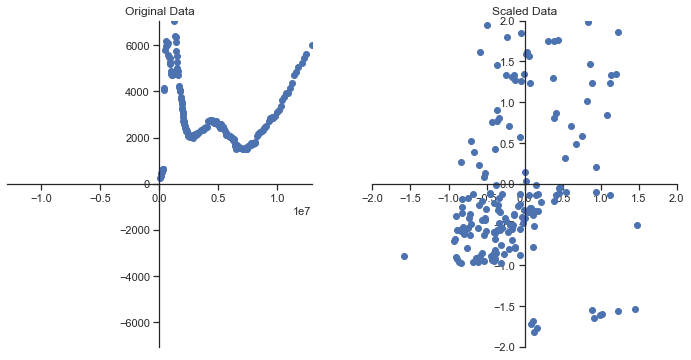

In [56]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [57]:
X.dtypes

hospitalizedIncrease                  int64
hospitalizedCurrently               float64
positive                              int64
positiveIncrease                      int64
recovered                           float64
positive_shifted_1                  float64
positive_shifted_3                  float64
positive_shifted_7                  float64
positive_shifted_10                 float64
hospitalizedCurrently_shifted_1     float64
hospitalizedCurrently_shifted_3     float64
hospitalizedCurrently_shifted_7     float64
hospitalizedCurrently_shifted_10    float64
recovered_shifted_1                 float64
recovered_shifted_3                 float64
recovered_shifted_7                 float64
recovered_shifted_10                float64
dtype: object

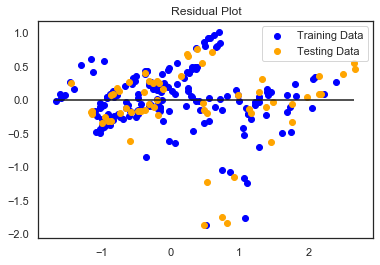

In [58]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [59]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Training scaled Data Score: 0.823419768336519
Testing scaled Data Score: 0.7857003453037851
Weight coefficients: [[ -0.02679397   2.05424148  12.98976164  -0.09288217   2.46993686
  -13.11958903 -13.83489913  -5.31832079   6.90478965  -0.06868987
   -0.17237387  -0.30926691  -0.7029921   -1.53476283  -7.68764844
    2.52894392  16.29982924]]
y-axis intercept: [1.85782869e-15]


In [60]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2992296480540761, R2: 0.7857003453037851


In [61]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[258.]
Predicted output:[1021.48]
Prediction Error:[763.48]


In [62]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)

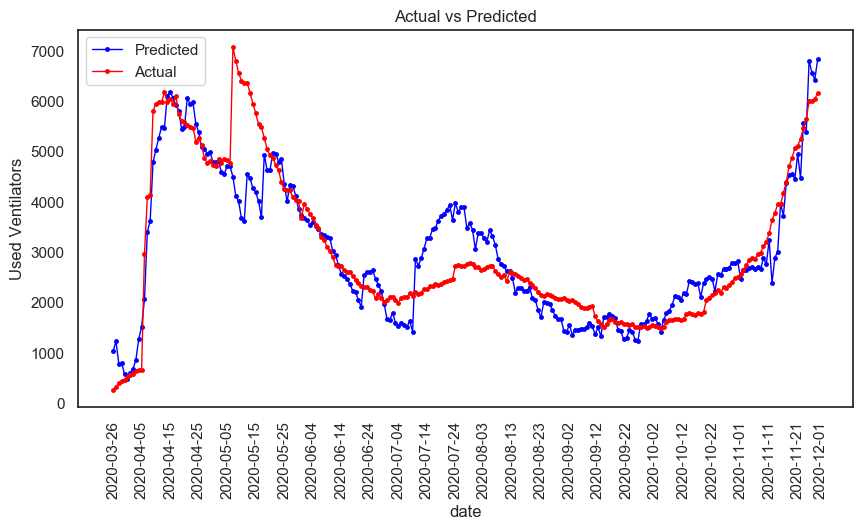

In [63]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data_Offset.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data_Offset.index, df_Covid_data_Offset['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

### Model 4 Neural Network Model